In [98]:
#라이브러리 import
import numpy as np
import pandas as pd

#### 변수(feature)
• yymmdd: year-month-day  
• hhnn: hour-minute  
• band1: 파랑 가시밴드  
• band2: 초록 가시밴드  
• band3: 빨강 가시밴드  
• band4: 식생 가시밴드  
• band5: 눈/얼음 가시밴드  
• band6: 권운 밴드  
• band7: 야간안개/하층운 밴드  
• band8: 상층 수증기 밴드  
• band9: 중층 수승기 밴드  
• band10: 하층 수증기 밴드  
• band11: 구름상 밴드  
• band12: 오존 밴드  
• band13: 대기창 밴드  
• band14: 깨끗한 대기창 밴드  
• band15: 오염된 대기창 밴드  
• band16: 이산화탄소 밴드  
• solarza: 태양 천정각  
• esr: 대기외 일사량

In [99]:
#stn = 115인 데이터 불러오기
uv_115 = pd.read_csv("../processed uv data/uv_stn115.csv")
uv_115.drop(['Unnamed: 0'], axis = 1, inplace = True)
uv_115.head(5)

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,20200101,0,115,130.89864,37.48129,0.0,0.00000,-0.00057,-0.00030,0.00075,...,244.56708,264.88004,263.95472,262.33534,253.25397,164.19725,43.74521,-9.452,222.8,4
1,20200101,10,115,130.89864,37.48129,0.0,0.00000,-0.00057,0.00030,-0.00045,...,245.49824,265.76909,265.69269,263.63271,254.02485,164.93007,43.74521,-9.452,222.8,4
2,20200101,20,115,130.89864,37.48129,0.0,-0.00057,0.00000,-0.00119,0.00075,...,246.67115,268.41295,268.53498,266.04024,255.68594,165.38181,43.74521,-9.452,222.8,4
3,20200101,30,115,130.89864,37.48129,0.0,-0.00057,-0.00057,-0.00179,-0.00030,...,246.87986,268.39616,268.58556,266.72067,255.86033,165.35315,43.74521,-9.452,222.8,4
4,20200101,40,115,130.89864,37.48129,0.0,-0.00057,-0.00057,0.00000,0.00045,...,247.31813,270.28852,270.75167,267.51774,256.22757,164.87451,43.74521,-9.452,222.8,4


In [100]:
#날짜, 시간 데이터 -> object 형으로 변환
uv_115['yyyymmdd'] = uv_115['yyyymmdd'].astype(str)
uv_115['hhnn'] = uv_115['hhnn'].astype(str)

uv_115.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101988 entries, 0 to 101987
Data columns (total 27 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   yyyymmdd  101988 non-null  object 
 1   hhnn      101988 non-null  object 
 2   stn       101988 non-null  int64  
 3   lon       101988 non-null  float64
 4   lat       101988 non-null  float64
 5   uv        93128 non-null   float64
 6   band1     101988 non-null  float64
 7   band2     101988 non-null  float64
 8   band3     101988 non-null  float64
 9   band4     101988 non-null  float64
 10  band5     101988 non-null  float64
 11  band6     101988 non-null  float64
 12  band7     101988 non-null  float64
 13  band8     101988 non-null  float64
 14  band9     101988 non-null  float64
 15  band10    101988 non-null  float64
 16  band11    101988 non-null  float64
 17  band12    101988 non-null  float64
 18  band13    101988 non-null  float64
 19  band14    101988 non-null  float64
 20  band

In [101]:
#날짜 형식: yyyy-mm-dd
#시간 형식: hh:nn
uv_115['yyyymmdd'] = pd.to_datetime(uv_115['yyyymmdd'])
uv_115['yyyymmdd'] = uv_115['yyyymmdd'].astype(str)

uv_115.head(5)

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,2020-01-01,0,115,130.89864,37.48129,0.0,0.00000,-0.00057,-0.00030,0.00075,...,244.56708,264.88004,263.95472,262.33534,253.25397,164.19725,43.74521,-9.452,222.8,4
1,2020-01-01,10,115,130.89864,37.48129,0.0,0.00000,-0.00057,0.00030,-0.00045,...,245.49824,265.76909,265.69269,263.63271,254.02485,164.93007,43.74521,-9.452,222.8,4
2,2020-01-01,20,115,130.89864,37.48129,0.0,-0.00057,0.00000,-0.00119,0.00075,...,246.67115,268.41295,268.53498,266.04024,255.68594,165.38181,43.74521,-9.452,222.8,4
3,2020-01-01,30,115,130.89864,37.48129,0.0,-0.00057,-0.00057,-0.00179,-0.00030,...,246.87986,268.39616,268.58556,266.72067,255.86033,165.35315,43.74521,-9.452,222.8,4
4,2020-01-01,40,115,130.89864,37.48129,0.0,-0.00057,-0.00057,0.00000,0.00045,...,247.31813,270.28852,270.75167,267.51774,256.22757,164.87451,43.74521,-9.452,222.8,4


In [102]:
for i in range(len(uv_115)):
    new_hhnn = '{0:0>4}'.format(uv_115['hhnn'][i])
    hhnn = '{0}:{1}'.format(new_hhnn[0:2], new_hhnn[2:])
    uv_115['hhnn'][i] = hhnn

C:\Users\dbs92\AppData\Local\Temp/ipykernel_10160/3085687854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uv_115['hhnn'][i] = hhnn


In [103]:
#yyyymmdd와 hhnn 합쳐서 새로운 datetime형 feature 만들기
uv_115['dateTime'] = uv_115['yyyymmdd'] + " " + uv_115['hhnn']
uv_115.head(5)

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band13,band14,band15,band16,solarza,sateza,esr,height,landtype,dateTime
0,2020-01-01,00:00,115,130.89864,37.48129,0.0,0.00000,-0.00057,-0.00030,0.00075,...,264.88004,263.95472,262.33534,253.25397,164.19725,43.74521,-9.452,222.8,4,2020-01-01 00:00
1,2020-01-01,00:10,115,130.89864,37.48129,0.0,0.00000,-0.00057,0.00030,-0.00045,...,265.76909,265.69269,263.63271,254.02485,164.93007,43.74521,-9.452,222.8,4,2020-01-01 00:10
2,2020-01-01,00:20,115,130.89864,37.48129,0.0,-0.00057,0.00000,-0.00119,0.00075,...,268.41295,268.53498,266.04024,255.68594,165.38181,43.74521,-9.452,222.8,4,2020-01-01 00:20
3,2020-01-01,00:30,115,130.89864,37.48129,0.0,-0.00057,-0.00057,-0.00179,-0.00030,...,268.39616,268.58556,266.72067,255.86033,165.35315,43.74521,-9.452,222.8,4,2020-01-01 00:30
4,2020-01-01,00:40,115,130.89864,37.48129,0.0,-0.00057,-0.00057,0.00000,0.00045,...,270.28852,270.75167,267.51774,256.22757,164.87451,43.74521,-9.452,222.8,4,2020-01-01 00:40


In [104]:
uv_115['dateTime'] = pd.to_datetime(uv_115['dateTime'])
uv_115 = uv_115.drop(['yyyymmdd', 'hhnn', 'lon', 'lat'], axis=1)
uv_115.head(5)

,stn,uv,band1,band2,band3,band4,band5,band6,band7,band8,...,band13,band14,band15,band16,solarza,sateza,esr,height,landtype,dateTime
0,115,0.0,0.00000,-0.00057,-0.00030,0.00075,0.0006,-0.00065,261.68631,239.67525,...,264.88004,263.95472,262.33534,253.25397,164.19725,43.74521,-9.452,222.8,4,2020-01-01 00:00:00
1,115,0.0,0.00000,-0.00057,0.00030,-0.00045,-0.0003,-0.00065,267.25473,239.50288,...,265.76909,265.69269,263.63271,254.02485,164.93007,43.74521,-9.452,222.8,4,2020-01-01 00:10:00
2,115,0.0,-0.00057,0.00000,-0.00119,0.00075,0.0000,0.00000,269.91688,239.24252,...,268.41295,268.53498,266.04024,255.68594,165.38181,43.74521,-9.452,222.8,4,2020-01-01 00:20:00
3,115,0.0,-0.00057,-0.00057,-0.00179,-0.00030,-0.0006,-0.00065,271.19063,239.41633,...,268.39616,268.58556,266.72067,255.86033,165.35315,43.74521,-9.452,222.8,4,2020-01-01 00:30:00
4,115,0.0,-0.00057,-0.00057,0.00000,0.00045,0.0003,-0.00065,270.98321,239.32955,...,270.28852,270.75167,267.51774,256.22757,164.87451,43.74521,-9.452,222.8,4,2020-01-01 00:40:00


In [105]:
#train set 구성
uv115_data = uv_115[(uv_115['dateTime']>= '2020-05-01') & (uv_115['dateTime']< '2020-07-01')]
uv115_data.head(5)

,stn,uv,band1,band2,band3,band4,band5,band6,band7,band8,...,band13,band14,band15,band16,solarza,sateza,esr,height,landtype,dateTime
17120,115,0.0,0.00000,0.00000,0.00030,0.00075,0.00000,0.00000,281.88250,233.40607,...,277.82840,278.25056,275.71853,262.56565,126.91833,43.74521,-5.66707,222.8,4,2020-05-01 00:00:00
17121,115,0.0,-0.00057,0.00057,0.00030,-0.00015,0.00000,0.00000,284.09268,234.03274,...,283.27994,283.55269,281.85022,267.42516,127.10593,43.74521,-5.66707,222.8,4,2020-05-01 00:10:00
17122,115,0.0,0.00566,0.00570,0.00149,-0.00075,0.00121,-0.00129,285.84482,234.64651,...,285.01048,285.35374,283.93780,268.73132,127.04191,43.74521,-5.66707,222.8,4,2020-05-01 00:30:00
17123,115,0.0,-0.00057,-0.00057,-0.00060,-0.00090,0.00121,0.00000,286.12554,235.24797,...,285.38623,285.72467,284.37212,269.09458,126.81207,43.74521,-5.66707,222.8,4,2020-05-01 00:40:00
17124,115,0.0,0.00000,-0.00057,0.00119,0.00030,0.00030,0.00000,285.67491,235.64237,...,285.41400,285.66768,284.28239,269.06003,126.47974,43.74521,-5.66707,222.8,4,2020-05-01 00:50:00


In [106]:
uv115_data.tail(5)

,stn,uv,band1,band2,band3,band4,band5,band6,band7,band8,...,band13,band14,band15,band16,solarza,sateza,esr,height,landtype,dateTime
25836,115,0.0,0.00000,0.00057,0.00030,0.00015,-0.0006,-0.00065,287.64354,242.31287,...,287.51567,287.18199,284.38707,270.28072,116.57809,43.74521,-4.05492,222.8,4,2020-06-30 23:10:00
25837,115,0.0,0.00000,-0.00057,-0.00060,-0.00075,0.0003,-0.00065,287.90552,242.47071,...,287.82776,287.37861,284.68571,270.45169,117.23763,43.74521,-4.05492,222.8,4,2020-06-30 23:20:00
25838,115,0.0,-0.00057,0.00000,-0.00089,0.00015,-0.0003,0.00000,288.16489,242.31287,...,288.01724,287.70088,284.98365,270.65655,117.81523,43.74521,-4.05492,222.8,4,2020-06-30 23:30:00
25839,115,0.0,0.00000,-0.00057,0.00000,0.00015,-0.0006,-0.00065,287.95760,242.54934,...,287.90901,287.63090,284.96877,270.75886,118.30858,43.74521,-4.05492,222.8,4,2020-06-30 23:40:00
25840,115,0.0,0.00000,-0.00057,-0.00119,-0.00030,-0.0006,0.00000,287.80104,242.93966,...,287.76000,287.37861,284.65588,270.31493,118.71558,43.74521,-4.05492,222.8,4,2020-06-30 23:50:00


In [107]:
#train set csv파일로 저장
uv115_data.to_csv('./data/uv115.csv', index=False)

In [108]:
#test set 구성
test = uv_115[(uv_115['dateTime']>= '2021-05-01') & (uv_115['dateTime']< '2021-07-01')]
test.head(5)

,stn,uv,band1,band2,band3,band4,band5,band6,band7,band8,...,band13,band14,band15,band16,solarza,sateza,esr,height,landtype,dateTime
67363,115,0.0,0.00000,-0.00057,0.00000,0.00135,0.00030,0.00064,270.98321,229.09150,...,261.71516,260.00405,257.69762,248.38023,127.21498,43.74521,-5.7099,222.8,4,2021-05-01 00:00:00
67364,115,0.0,0.00000,0.00000,0.00000,0.00030,-0.00030,0.00000,253.16352,228.34692,...,247.74713,245.93232,244.66240,239.75177,127.40485,43.74521,-5.7099,222.8,4,2021-05-01 00:10:00
67365,115,0.0,0.00566,0.00513,0.00387,0.00090,0.00121,-0.00129,260.54413,229.09150,...,251.15496,249.08826,246.78088,241.39827,127.34432,43.74521,-5.7099,222.8,4,2021-05-01 00:30:00
67366,115,0.0,0.00000,0.00000,0.00000,0.00015,0.00000,0.00000,264.08767,227.83939,...,251.95026,249.02470,245.94398,239.29548,127.11450,43.74521,-5.7099,222.8,4,2021-05-01 00:40:00
67367,115,0.0,0.00000,-0.00114,-0.00119,0.00075,0.00000,0.00000,267.74103,229.21372,...,256.89593,254.82616,251.72453,243.78221,126.78164,43.74521,-5.7099,222.8,4,2021-05-01 00:50:00


In [109]:
#test set csv파일로 저장
test.to_csv("./data/test115.csv", index = False)

In [110]:
#train set 새로운 데이터프레임으로 불러오기(오류 방지)
df115 = pd.read_csv("./data/uv115.csv")
df115.head(5)

,stn,uv,band1,band2,band3,band4,band5,band6,band7,band8,...,band13,band14,band15,band16,solarza,sateza,esr,height,landtype,dateTime
0,115,0.0,0.00000,0.00000,0.00030,0.00075,0.00000,0.00000,281.88250,233.40607,...,277.82840,278.25056,275.71853,262.56565,126.91833,43.74521,-5.66707,222.8,4,2020-05-01 00:00:00
1,115,0.0,-0.00057,0.00057,0.00030,-0.00015,0.00000,0.00000,284.09268,234.03274,...,283.27994,283.55269,281.85022,267.42516,127.10593,43.74521,-5.66707,222.8,4,2020-05-01 00:10:00
2,115,0.0,0.00566,0.00570,0.00149,-0.00075,0.00121,-0.00129,285.84482,234.64651,...,285.01048,285.35374,283.93780,268.73132,127.04191,43.74521,-5.66707,222.8,4,2020-05-01 00:30:00
3,115,0.0,-0.00057,-0.00057,-0.00060,-0.00090,0.00121,0.00000,286.12554,235.24797,...,285.38623,285.72467,284.37212,269.09458,126.81207,43.74521,-5.66707,222.8,4,2020-05-01 00:40:00
4,115,0.0,0.00000,-0.00057,0.00119,0.00030,0.00030,0.00000,285.67491,235.64237,...,285.41400,285.66768,284.28239,269.06003,126.47974,43.74521,-5.66707,222.8,4,2020-05-01 00:50:00


In [111]:
#test set 새로운 데이터프레임으로 불러오기(오류 방지)
test = pd.read_csv("./data/test115.csv")
test.head(5)

,stn,uv,band1,band2,band3,band4,band5,band6,band7,band8,...,band13,band14,band15,band16,solarza,sateza,esr,height,landtype,dateTime
0,115,0.0,0.00000,-0.00057,0.00000,0.00135,0.00030,0.00064,270.98321,229.09150,...,261.71516,260.00405,257.69762,248.38023,127.21498,43.74521,-5.7099,222.8,4,2021-05-01 00:00:00
1,115,0.0,0.00000,0.00000,0.00000,0.00030,-0.00030,0.00000,253.16352,228.34692,...,247.74713,245.93232,244.66240,239.75177,127.40485,43.74521,-5.7099,222.8,4,2021-05-01 00:10:00
2,115,0.0,0.00566,0.00513,0.00387,0.00090,0.00121,-0.00129,260.54413,229.09150,...,251.15496,249.08826,246.78088,241.39827,127.34432,43.74521,-5.7099,222.8,4,2021-05-01 00:30:00
3,115,0.0,0.00000,0.00000,0.00000,0.00015,0.00000,0.00000,264.08767,227.83939,...,251.95026,249.02470,245.94398,239.29548,127.11450,43.74521,-5.7099,222.8,4,2021-05-01 00:40:00
4,115,0.0,0.00000,-0.00114,-0.00119,0.00075,0.00000,0.00000,267.74103,229.21372,...,256.89593,254.82616,251.72453,243.78221,126.78164,43.74521,-5.7099,222.8,4,2021-05-01 00:50:00


In [112]:
#X, Y 지정
columns = ['band1', 'band2', 'band3', 'band4', 'band5', 'band6', 'band7', 'band8', 'band9', 'band10', 'band11',
                'band12', 'band13', 'band14', 'band15', 'band16', 'solarza', 'esr']
X = df115[columns]
Y = df115['uv']

#train set : test set ~=~ 0.8 : 0.2
test_data = test.sample(frac = 0.25)
x_test = test_data[columns]
y_test = test_data['uv']

In [113]:
#모델 학습
from sklearn import linear_model

lr = linear_model.LinearRegression()
model = lr.fit(X, Y)

In [114]:
#예측값 저장
y_predict = lr.predict(x_test)

In [115]:
#회귀 계수
coef1 = pd.DataFrame(zip(X.columns, lr.coef_), columns = ['feature', 'coefficients'])
coef1

,feature,coefficients
0,band1,65.606833
1,band2,-87.343859
2,band3,-5.564096
3,band4,20.644885
4,band5,1.071034
5,band6,-0.914827
6,band7,-0.003916
7,band8,-0.017780
8,band9,0.018148
9,band10,0.013705


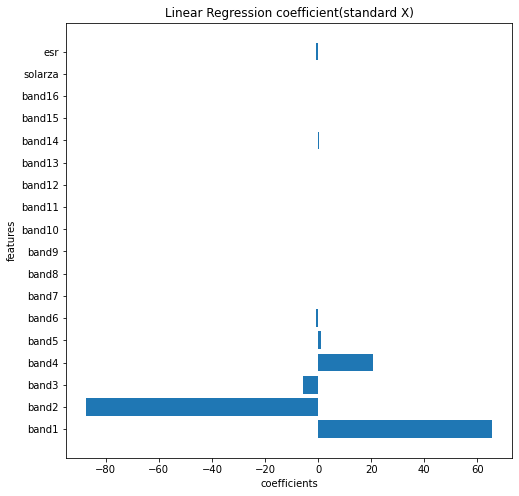

In [116]:
#회귀 계수 시각화
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))

plt.barh(coef1['feature'], coef1['coefficients'])
plt.title("Linear Regression coefficient(standard X)")
plt.xlabel("coefficients")
plt.ylabel("features")
plt.show()

In [117]:
#모델 평가
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print('rmse: ', rmse)

rmse:  1.2826964794388602


In [118]:
#유의성 검정
import statsmodels.api as sm
X2 = sm.add_constant(X)

model2 = sm.OLS(Y, X2).fit()
model2.summary()

C:\Users\dbs92\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     uv   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     2688.
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:44:45   Log-Likelihood:                -13624.
No. Observations:                8721   AIC:                         2.729e+04
Df Residuals:                    8702   BIC:                         2.742e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8486      1.133     11.339      0.000      10.627      15.070
band1         65.6068      3.630     18.071      0.000      58.490      72.723
band2        -87.3439      3.914    -22.314      0.000     -95.017     -79.671
band3         -5.5641      0.651     -8.551      0.000      -6.840      -4.289
band4         20.6449      0.849     24.318      0.000      18.981      22.309
band5          1.0710      0.677      1.583      0.114      -0.255       2.398
band6         -0.9148      0.529     -1.731      0.084      -1.951       0.121
band7         -0.0039      0.005     -0.862      0.389      -0.013       0.005
band8         -0.0178      0.018     -0.991      0.322      -0.053       0.017
band9          0.0181      0.030      0.614      0.539      -0.040       0.076
band10         0.0137      0.020      0.677      0.498      -0.026       0.053
band11         0.0026      0.029      0.090      0.929      -0.053       0.058
band12         0.0436      0.008      5.269      0.000       0.027       0.060
band13        -0.1232      0.040     -3.093      0.002      -0.201      -0.045
band14         0.3134      0.051      6.143      0.000       0.213       0.413
band15        -0.2188      0.036     -6.084      0.000      -0.289      -0.148
band16        -0.0170      0.021     -0.807      0.419      -0.058       0.024
solarza       -0.1604      0.003    -63.999      0.000      -0.165      -0.155
esr           -0.6330      0.016    -38.804      0.000      -0.665      -0.601
==============================================================================
Omnibus:                      291.095   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              547.734
Skew:                           0.258   Prob(JB):                    1.15e-119
Kurtosis:                       4.114   Cond. No.                     3.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

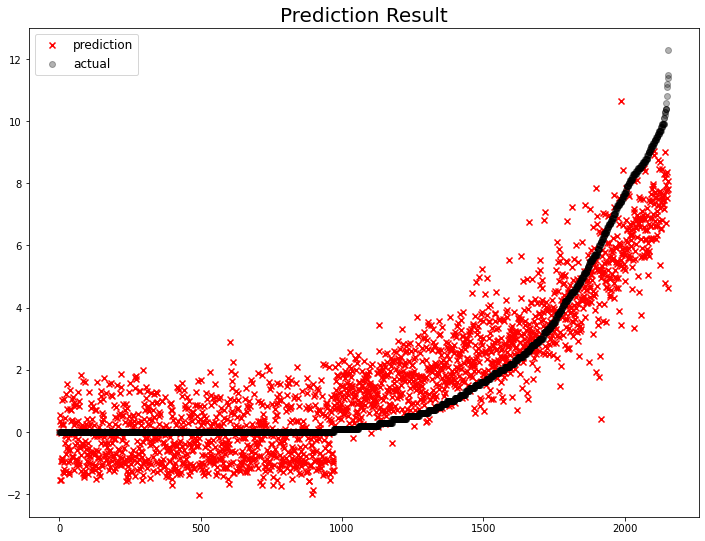

In [128]:
#예측값 및 실제값 시각화
df = pd.DataFrame({'actual': y_test, 'prediction': y_predict})
df = df.sort_values(by='actual').reset_index(drop=True)

plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], marker='x', color='r')
plt.scatter(df.index, df['actual'], alpha=0.3, marker='o', color='black')
plt.title("Prediction Result", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()

In [119]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df115_standard = df115
df115_standard[columns] = scaler.fit_transform(df115_standard[columns])

test_standard = test
test_standard[columns] = scaler.fit_transform(test_standard[columns])

In [120]:
df115_standard.head(5)

,stn,uv,band1,band2,band3,band4,band5,band6,band7,band8,...,band13,band14,band15,band16,solarza,sateza,esr,height,landtype,dateTime
0,115,0.0,-0.709833,-0.670829,-0.602664,-0.655583,-0.383276,-0.610081,0.031130,-0.487575,...,0.198765,0.241634,0.216956,0.189609,1.538359,43.74521,-1.601449,222.8,4,2020-05-01 00:00:00
1,115,0.0,-0.713493,-0.667189,-0.602664,-0.660878,-0.383276,-0.610081,0.182504,-0.391211,...,0.499608,0.524774,0.550779,0.544219,1.543713,43.74521,-1.601449,222.8,4,2020-05-01 00:10:00
2,115,0.0,-0.673495,-0.634429,-0.595172,-0.664408,-0.351302,-0.622926,0.302507,-0.296829,...,0.595108,0.620952,0.664432,0.639533,1.541886,43.74521,-1.601449,222.8,4,2020-05-01 00:30:00
3,115,0.0,-0.713493,-0.674469,-0.608330,-0.665290,-0.351302,-0.610081,0.321733,-0.204341,...,0.615844,0.640760,0.688077,0.666041,1.535326,43.74521,-1.601449,222.8,4,2020-05-01 00:40:00
4,115,0.0,-0.709833,-0.674469,-0.597061,-0.658230,-0.375349,-0.610081,0.290870,-0.143693,...,0.617376,0.637717,0.683192,0.663519,1.525841,43.74521,-1.601449,222.8,4,2020-05-01 00:50:00


In [121]:
test_standard.head(5)

,stn,uv,band1,band2,band3,band4,band5,band6,band7,band8,...,band13,band14,band15,band16,solarza,sateza,esr,height,landtype,dateTime
0,115,0.0,-0.730684,-0.703945,-0.648993,-0.651070,-0.420223,-0.646865,-0.598615,-1.060937,...,-0.528467,-0.572741,-0.603488,-0.678415,1.536387,43.74521,-1.597564,222.8,4,2021-05-01 00:00:00
1,115,0.0,-0.730684,-0.700770,-0.648993,-0.656423,-0.433135,-0.652715,-1.766593,-1.176226,...,-1.265008,-1.293367,-1.287617,-1.289358,1.541823,43.74521,-1.597564,222.8,4,2021-05-01 00:10:00
2,115,0.0,-0.699083,-0.672192,-0.627704,-0.653364,-0.400641,-0.664508,-1.282837,-1.060937,...,-1.085311,-1.131749,-1.176432,-1.172777,1.540090,43.74521,-1.597564,222.8,4,2021-05-01 00:30:00
3,115,0.0,-0.730684,-0.700770,-0.648993,-0.657187,-0.426679,-0.652715,-1.050578,-1.254810,...,-1.043375,-1.135004,-1.220355,-1.321666,1.533511,43.74521,-1.597564,222.8,4,2021-05-01 00:40:00
4,115,0.0,-0.730684,-0.707121,-0.655539,-0.654128,-0.426679,-0.652715,-0.811122,-1.042013,...,-0.782587,-0.837905,-0.916974,-1.003981,1.523981,43.74521,-1.597564,222.8,4,2021-05-01 00:50:00


In [122]:
#변수 지정2
x_standard = df115_standard[columns]
y_standard = df115_standard['uv']

test_data2 = test_standard.sample(frac = 0.25)
x_test2 = test_data2[columns]
y_test2 = test_data2['uv']

In [123]:
#모델 학습2
model_standard = lr.fit(x_standard, y_standard)

In [124]:
#회귀 계수
coef2 = pd.DataFrame(zip(x_standard.columns, lr.coef_), columns = ['feature', 'coefficients'])
coef2

,feature,coefficients
0,band1,10.218750
1,band2,-13.677656
2,band3,-0.883787
3,band4,3.509033
4,band5,0.040531
5,band6,-0.091876
6,band7,-0.057182
7,band8,-0.115625
8,band9,0.152773
9,band10,0.139893


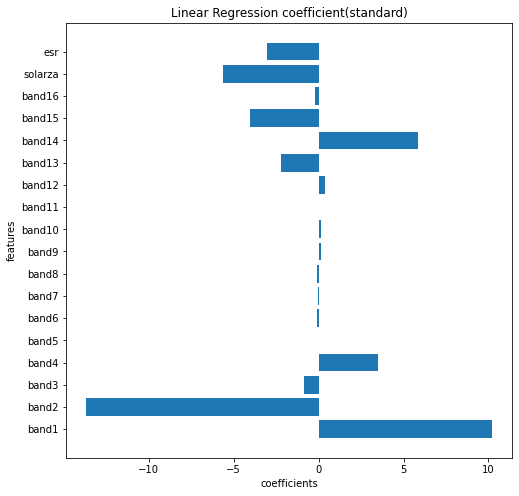

In [125]:
#회귀 계수 시각화
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))

plt.barh(coef2['feature'], coef2['coefficients'])
plt.title("Linear Regression coefficient(standard)")
plt.xlabel("coefficients")
plt.ylabel("features")
plt.show()

In [126]:
#모델 test
y_predict2 = lr.predict(x_test2)

In [127]:
#모델 평가
from sklearn.metrics import mean_squared_error, r2_score

mse2 = mean_squared_error(y_test2, y_predict2)
rmse2 = np.sqrt(mse2)

print('rmse2: ', rmse2)

rmse2:  1.3490354859940679


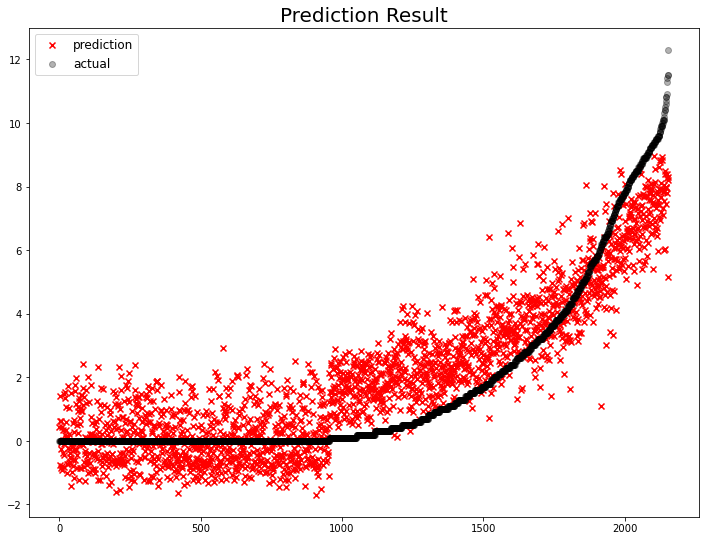

In [129]:
#예측값 및 실제값 시각화
df = pd.DataFrame({'actual': y_test2, 'prediction': y_predict2})
df = df.sort_values(by='actual').reset_index(drop=True)

plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], marker='x', color='r')
plt.scatter(df.index, df['actual'], alpha=0.3, marker='o', color='black')
plt.title("Prediction Result", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()